In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [3]:
def random_batch():
    random_inputs = []
    random_labels = []
    # batch_size개의 랜덤한 인덱스 뽑기
    random_index = np.random.choice(range(len(skip_grams)), batch_size, replace=False)
    
    input_vectors = np.eye(vocab_size) # vocab_size x vocab_size인 단위행렬(항등행렬)
    for idx in random_index:
        random_inputs.append(input_vectors[skip_grams[idx][0]]) # target의 input vector
        random_labels.append(skip_grams[idx][1]) # context word (index)
        
    return random_inputs, random_labels

In [4]:
class Word2Vec(nn.Module):
    def __init__(self):
        super(Word2Vec, self).__init__()
        
        self.W = nn.Linear(vocab_size, embedding_size, bias=False)
        self.WT = nn.Linear(embedding_size, vocab_size, bias=False)
        
    def forward(self, X):
        # X: (batch_size, vocab_size) # random_inputs
        hidden_layer = self.W(X) # (batch_size, embedding_size)
        output_layer = self.WT(hidden_layer) # (batch_size, vocab_size)
        return output_layer

In [5]:
batch_size = 2 # mini-batch
embedding_size = 2

sentences = ["apple banana fruit", "banana orange fruit", "orange banana fruit", \
             "dog cat animal", "cat monkey animal", "monkey dog animal"]

In [6]:
word_sequence = " ".join(sentences).split() # 모든 단어 리스트
word_sequence

['apple',
 'banana',
 'fruit',
 'banana',
 'orange',
 'fruit',
 'orange',
 'banana',
 'fruit',
 'dog',
 'cat',
 'animal',
 'cat',
 'monkey',
 'animal',
 'monkey',
 'dog',
 'animal']

In [7]:
word_list = list(set(word_sequence)) # 중복 단어 제거한 리스트
word_list

['monkey', 'fruit', 'apple', 'orange', 'cat', 'animal', 'banana', 'dog']

In [8]:
word_dict = {word: idx for idx, word in enumerate(word_list)}
word_dict

{'monkey': 0,
 'fruit': 1,
 'apple': 2,
 'orange': 3,
 'cat': 4,
 'animal': 5,
 'banana': 6,
 'dog': 7}

In [9]:
vocab_size = len(word_list)

In [10]:
skip_grams = []
for idx in range(1, len(word_sequence) - 1):
    target = word_dict[word_sequence[idx]] # 단어의 인덱스
    context = [word_dict[word_sequence[idx - 1]], word_dict[word_sequence[idx + 1]]]
    for w in context:
        skip_grams.append([target, w])

In [11]:
skip_grams

[[6, 2],
 [6, 1],
 [1, 6],
 [1, 6],
 [6, 1],
 [6, 3],
 [3, 6],
 [3, 1],
 [1, 3],
 [1, 3],
 [3, 1],
 [3, 6],
 [6, 3],
 [6, 1],
 [1, 6],
 [1, 7],
 [7, 1],
 [7, 4],
 [4, 7],
 [4, 5],
 [5, 4],
 [5, 4],
 [4, 5],
 [4, 0],
 [0, 4],
 [0, 5],
 [5, 0],
 [5, 0],
 [0, 5],
 [0, 7],
 [7, 0],
 [7, 5]]

In [16]:
model = Word2Vec()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [17]:
# Training

for epoch in range(5000):
    input_batch, target_batch = random_batch() # batch_size개의 input과 target
    input_batch = torch.Tensor(input_batch)
    target_batch = torch.LongTensor(target_batch) # Tensor()는 float만 가능해서 LongTensor()로
    
    optimizer.zero_grad()
    output = model(input_batch)
    
    loss = criterion(output, target_batch)
    if (epoch + 1) % 1000 == 0:
        print('Epoch: {:4d}  cost: {:.6f}'.format(epoch + 1, loss))
        
    loss.backward()
    optimizer.step()

Epoch: 1000  cost: 1.396200
Epoch: 2000  cost: 2.009082
Epoch: 3000  cost: 1.294001
Epoch: 4000  cost: 1.384461
Epoch: 5000  cost: 0.652075


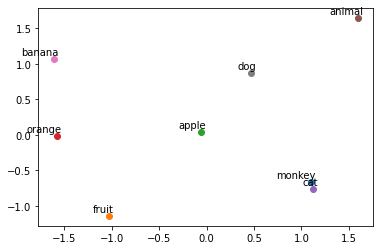

In [18]:
for idx, label in enumerate(word_list):
    W, WT = model.parameters()
    x, y = W[0][idx].item(), W[1][idx].item()
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()